<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/2024_07_11_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("https://raw.githubusercontent.com/Annepikson/HypatiaAcademy/master/ml/Life%20Expectancy%20Data.csv")

df.columns = df.columns.str.strip()

df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [298]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [299]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [300]:
# Handle missing values by filling them with 0
#df['Alcohol'] = df['Alcohol'].fillna(0)

# Convert the 'Alcohol' column to integers
#df['Alcohol'] = df['Alcohol'].astype(int)

df['Alcohol'].isna().sum()

0

In [301]:
import re

def tonumber(n):
    s = str(n)  # Convert the value to strin
    s = re.sub(r'[^0-9.]', '', s)  # Remove all characters except digits and the decimal point
    return int(float(s))  # Convert to float first, then to int


In [302]:
#df['Diphtheria'] = df['Diphtheria'].fillna(0)
#df['Diphtheria'] = df['Diphtheria'].astype(int)

x6=df['Schooling']
x7=df['infant deaths']
x8=df['Polio']
x9=df['Schooling']


In [303]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x5=le.fit_transform(df['Status'])



In [304]:
# real

y=df['Life expectancy'].values



In [305]:
x1=df['Alcohol']

In [306]:
# too many nan
x2=df['Diphtheria']
df['Diphtheria'].isna().sum()

0

In [307]:
x3=df['under-five deaths'].apply(tonumber)
df['under-five deaths'].isna().sum()

0

In [308]:
x4=df['percentage expenditure'].apply(tonumber)
df['under-five deaths'].isna().sum()

0

In [309]:

import numpy as np

X=np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9))
X

array([[ 0.01, 65.  , 83.  , ..., 62.  ,  6.  , 10.1 ],
       [ 0.01, 62.  , 86.  , ..., 64.  , 58.  , 10.  ],
       [ 0.01, 64.  , 89.  , ..., 66.  , 62.  ,  9.9 ],
       ...,
       [ 4.43, 71.  , 40.  , ..., 25.  , 73.  , 10.  ],
       [ 1.72, 75.  , 39.  , ..., 25.  , 76.  ,  9.8 ],
       [ 1.68, 78.  , 39.  , ..., 24.  , 78.  ,  9.8 ]])

In [310]:
# train to means trains to calculate coefficients

# test means to test whether it's working or close or logical


# bad practice, will skew the results, better to delete or replace with other techniques

# Replace NaN with zero
#X[np.isnan(X)] = 0
#y[np.isnan(y)] = 0


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)



#xtrain,xtest=np.array_split(X, 2)
#ytrain,ytest=np.array_split(y, 2)



In [311]:
xtest[0]

array([ 0.6, 73. , 91. ,  9. ,  1. ,  7.3, 54. , 77. ,  7.3])

In [312]:
ytest[0]

56.5

In [313]:
array=xtrain

# Step 1: Create a boolean mask indicating where NaNs are present
nan_mask = np.isnan(array)

# Step 2: Determine which rows contain any NaN values
rows_with_nan = np.any(nan_mask, axis=1)

# Step 3: Use the mask to extract the rows with NaNs
rows_with_nan_values = array[rows_with_nan]

print("Rows with NaN values:")
print(rows_with_nan_values)

rows_with_nan_values.shape

Rows with NaN values:
[]


(0, 9)

In [314]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [315]:
np.set_printoptions(suppress=True, precision=10)

print('Coefficients: \n', reg.coef_)
print('\n Intercept: \n', reg.intercept_)



Coefficients: 
 [-0.2289584269  0.0203499417 -0.1264856246  0.0007063262 -2.8422072632
  0.9898625429  0.1685213678  0.0028169805  0.9898625429]

 Intercept: 
 46.4892047592044


In [316]:
ypred = reg.predict(xtest)

In [317]:
ypred.shape

(330,)

In [318]:
xtest.shape

(330, 9)

In [319]:
xtrain[0]

array([ 3.65, 88.  ,  9.  , 16.  ,  1.  , 12.7 ,  8.  ,  9.  , 12.7 ])

In [320]:
xtest[0]

array([ 0.6, 73. , 91. ,  9. ,  1. ,  7.3, 54. , 77. ,  7.3])

In [321]:
# how do I manually calculated life expectancy

#ple = 0.2616921268 * 2 + 0.1729257589 * 75 + -0.0014663545 * 1 + 0.0011650272  * 618 + -4.6115844772 * 1 + 57.16347428686578
#ple

In [322]:
ytest[0]

56.5

In [323]:
ytrain[0]

74.4

In [324]:
ypred[0]

57.26038776596682

In [325]:
#. HUGE MISTAKE

#print('Mean squared error: %.2f' % mean_squared_error(ytrain, ypred))

#print('Coefficient of determination: %.2f' % r2_score(ytrain, ypred))




print('Mean squared error: %.2f' % mean_squared_error(ytest, ypred))

print('Coefficient of determination: %.2f' % r2_score(ytest, ypred))

Mean squared error: 35.66
Coefficient of determination: 0.54


In [326]:
Z= np.column_stack([xtest,ytest,ypred])


ytests=ytest[0:20]
ypreds=ypred[0:20]

xs=np.arange(0,20)

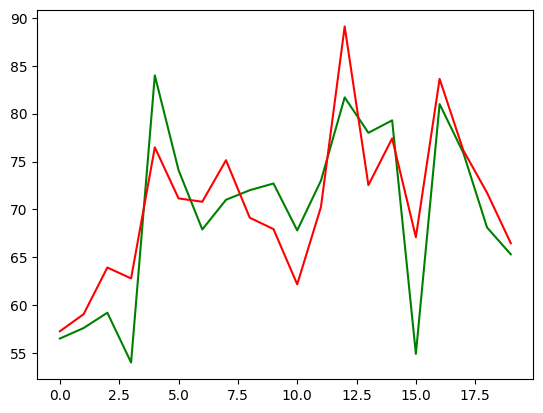

In [329]:
plt.plot(xs,ytests,color='green')
plt.plot(xs,ypreds,color='red')
plt.show()